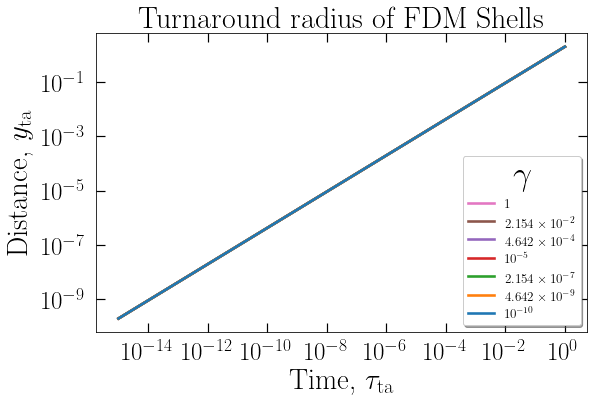

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from adaptive_integrator import integrate
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

fig,ax = plt.subplots(1, figsize = (8.8, 5.5))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

# Turnaround radius of FDM shell when the quantum pressure 
# of FDM Bosons is considered negligible under the assumption 
# that the typical size of the solitonic radius should always much 
# smaller than the typical size of the Turnaround radius of FDM shell around a PBH. 
# This eq. is similar to eq.(5) in reference
# "WIMPs and stellar-mass primordial black holes are incompatible".
# Also calculated as the Turnaround radius of CDM shells in the first project. 



# Turnaround radius of the FDM shell around PBH of mass M_pbh.


from scipy.optimize import root
# Ignoring the gamma term for much smaller values of gamma which coincides
# with the turnaround of CDM shell around the PBH of mass M

#here, tau = tau_ta

import sympy as sm
from sympy import symbols 

def r_turnaround_approx(tau):  
    return (8  * (tau**(2)))**(1/3)




        
        
def r_turnaround_full(tau, gamma):
    x = symbols('x', real=True)

    def evaluate(gamma, tau):
        def expression(x):
            return (x**4) - (8 * x * (tau**2)) + ((2*gamma - gamma**2) * (tau**2))
        if  (8 * (tau**2)) > ((2*gamma - gamma**2) * (tau**2)):
            y_ta = r_turnaround_approx(tau)
            return y_ta
        else:
            initial_guess = r_turnaround_approx(tau) 
            solution = fsolve(expression, x)
            y_ta = solution.x
            return y_ta
        
    return evaluate(gamma, tau)



tau_arr = np.geomspace(1e-15, 1, 10)
gamma_arr = np.geomspace(1 , 1e-10, 7)



colors = ['C6','C5','C4', 'C3','C2', 'C1','C0']
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    ax.loglog(tau_arr, [r_turnaround_full(tau, gamma) for tau in tau_arr], color =color)
    

    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend( [r'$1$', r'$2.154\times10^{-2}$',  r'$4.642\times10^{-4}$', r'$10^{-5}$', r'$2.154\times10^{-7}$',
    r'$ 4.642\times10^{-9}$', r'$10^{-10}$'],prop = {'size':13.2}, loc = 'lower right',shadow = True, title = '$\gamma$' ,title_fontsize = 34,
           facecolor = 'white',fontsize = 25)
plt.title(r'Turnaround radius of FDM Shells', fontsize = 30)
plt.savefig("yta_diffshells.pdf", bbox_inches = "tight")
plt.show()